In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2. Linear regression with one variable

### 2.1 Plotting  the Data

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',', usecols=(0,1), unpack=True)
data

array([[  6.1101 ,   5.5277 ,   8.5186 ,   7.0032 ,   5.8598 ,   8.3829 ,
          7.4764 ,   8.5781 ,   6.4862 ,   5.0546 ,   5.7107 ,  14.164  ,
          5.734  ,   8.4084 ,   5.6407 ,   5.3794 ,   6.3654 ,   5.1301 ,
          6.4296 ,   7.0708 ,   6.1891 ,  20.27   ,   5.4901 ,   6.3261 ,
          5.5649 ,  18.945  ,  12.828  ,  10.957  ,  13.176  ,  22.203  ,
          5.2524 ,   6.5894 ,   9.2482 ,   5.8918 ,   8.2111 ,   7.9334 ,
          8.0959 ,   5.6063 ,  12.836  ,   6.3534 ,   5.4069 ,   6.8825 ,
         11.708  ,   5.7737 ,   7.8247 ,   7.0931 ,   5.0702 ,   5.8014 ,
         11.7    ,   5.5416 ,   7.5402 ,   5.3077 ,   7.4239 ,   7.6031 ,
          6.3328 ,   6.3589 ,   6.2742 ,   5.6397 ,   9.3102 ,   9.4536 ,
          8.8254 ,   5.1793 ,  21.279  ,  14.908  ,  18.959  ,   7.2182 ,
          8.2951 ,  10.236  ,   5.4994 ,  20.341  ,  10.136  ,   7.3345 ,
          6.0062 ,   7.2259 ,   5.0269 ,   6.5479 ,   7.5386 ,   5.0365 ,
         10.274  ,   5.1077 ,   5.7292

In [3]:
X = np.transpose(data[:-1])
y = np.transpose(data[-1:])
m=y.size
# 첫번째 컬럼에 1을 넣은 X matrix 생성
X=np.insert(X,0,1,axis=1)

In [4]:
X[:5]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [5]:
y[:5]

array([[ 17.592 ],
       [  9.1302],
       [ 13.662 ],
       [ 11.854 ],
       [  6.8233]])

In [6]:
m

97

Text(0.5,0,'Population of City in 10,000s')

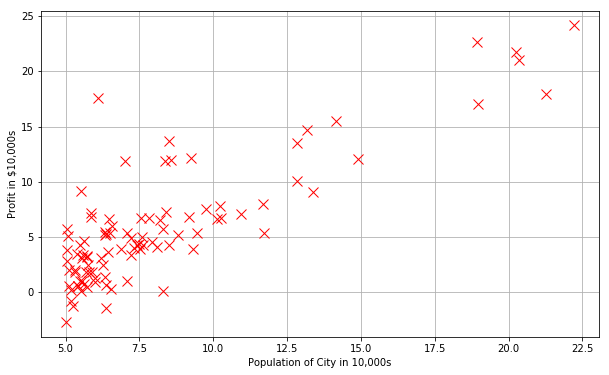

In [7]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1], y[:,0], 'rx', markersize=10) #red and x
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

### 2.2 Gradient Descent

In [8]:
iterations = 1500
alpha = 0.01

In [9]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y))) # 1/2m * sum(h-y)^2

In [10]:
#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)): #startwith ([0,0])
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*X[:,j].reshape(m,1))
            
        theta = tmptheta
    return theta, thetahistory, jvec

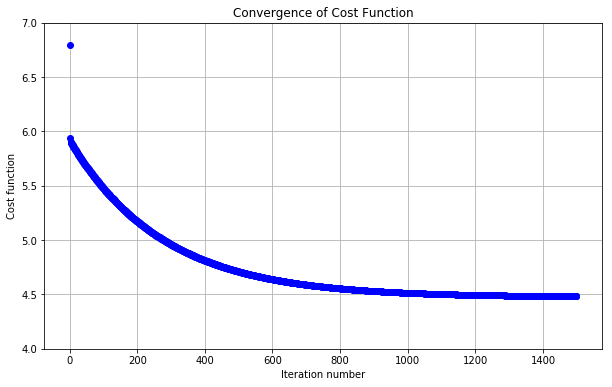

In [11]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

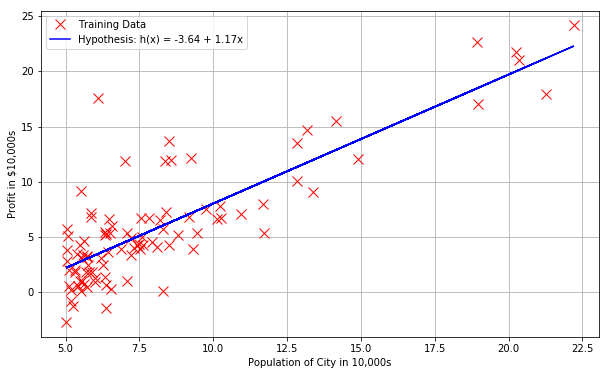

In [12]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

### 2.4 Visualizing J(θ)

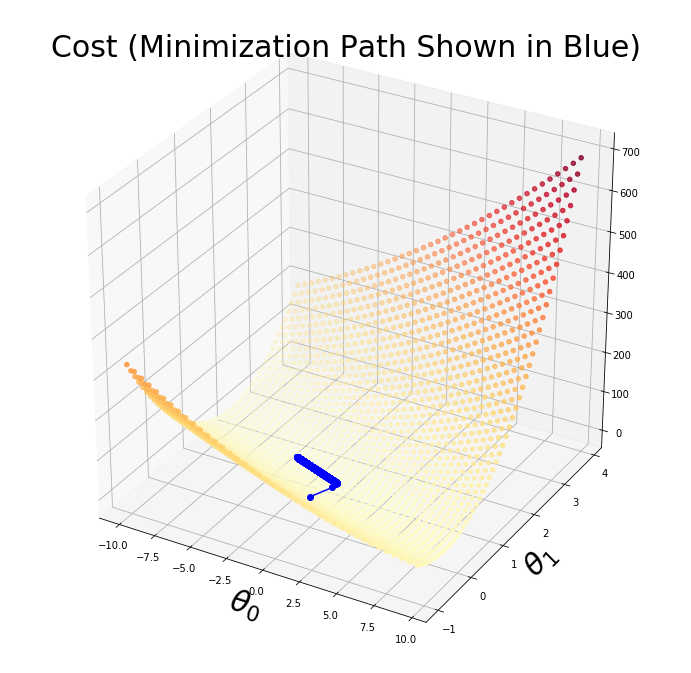

In [13]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []

for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

### 3. Linear Regression with multiple variables

In [14]:
datafile = 'data/ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1) #1을 넣는 이유는 계산의 편의상 (bias)

In [15]:
X[:5]

array([[  1.00000000e+00,   2.10400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.60000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.40000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.41600000e+03,   2.00000000e+00],
       [  1.00000000e+00,   3.00000000e+03,   4.00000000e+00]])

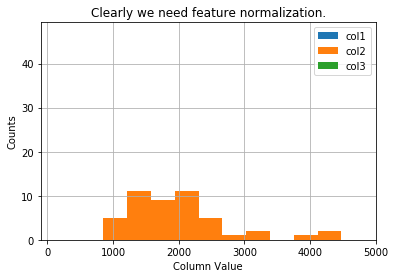

In [16]:
#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000]) #x limit
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [17]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column (Cuz 0 = False)
    if not icol: continue 
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

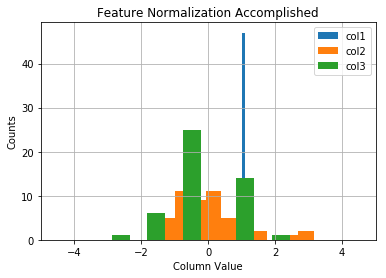

In [18]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

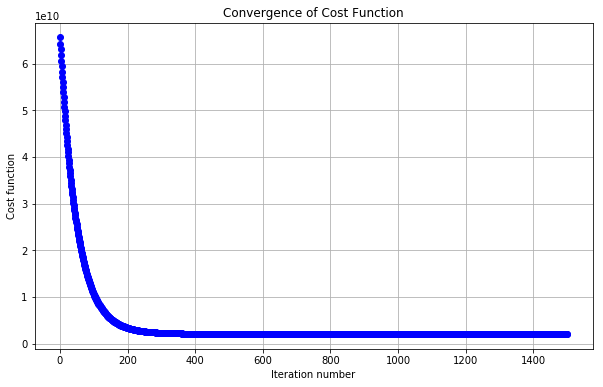

In [19]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

#Plot convergence of cost function:
plotConvergence(jvec)

In [20]:
#print "Final result theta parameters: \n",theta
print ("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("$%0.2f" % float(h(theta,ytestscaled)))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293098.15


In [21]:
from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [22]:
print ("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print ("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46


In [23]:
np.array(h(theta, X)[:,0])

array([  2.30438905e+08,   1.75315582e+08,   2.62812920e+08,
         1.55197696e+08,   3.28429421e+08,   2.17417173e+08,
         1.68097051e+08,   1.56394282e+08,   1.51253814e+08,
         1.63722184e+08,   2.12495448e+08,   2.19064251e+08,
         2.07033367e+08,   4.90074251e+08,   1.39004186e+08,
         2.51869250e+08,   1.44698016e+08,   1.35504293e+08,
         2.85665097e+08,   3.31819943e+08,   1.93580651e+08,
         2.06821126e+08,   1.75753068e+08,   2.14901625e+08,
         4.25776712e+08,   1.20629745e+08,   1.59784804e+08,
         2.76593751e+08,   2.40938585e+08,   2.88734006e+08,
         2.01461914e+08,   1.09705583e+08,   2.23432615e+08,
         3.43419843e+08,   1.98386502e+08,   1.57487999e+08,
         1.35832408e+08,   2.33494809e+08,   4.61316003e+08,
         2.36775959e+08,   1.82321871e+08,   2.45094709e+08,
         2.81071487e+08,   1.31566913e+08,   9.35120729e+07,
         2.02870741e+08,   1.31895028e+08])

In [24]:
y[:,0]

array([ 399900.,  329900.,  369000.,  232000.,  539900.,  299900.,
        314900.,  198999.,  212000.,  242500.,  239999.,  347000.,
        329999.,  699900.,  259900.,  449900.,  299900.,  199900.,
        499998.,  599000.,  252900.,  255000.,  242900.,  259900.,
        573900.,  249900.,  464500.,  469000.,  475000.,  299900.,
        349900.,  169900.,  314900.,  579900.,  285900.,  249900.,
        229900.,  345000.,  549000.,  287000.,  368500.,  329900.,
        314000.,  299000.,  179900.,  299900.,  239500.])

D:\ProgramFiles\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
D:\ProgramFiles\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:730: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


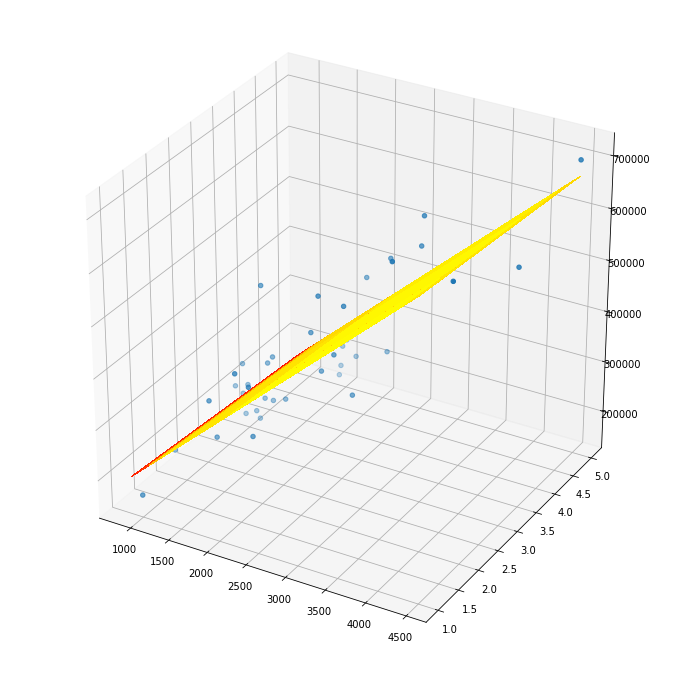

In [28]:
# Plotting
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

a = X[:,1]
b = X[:,2]

a,b= np.meshgrid(a,b)

norm_a = (X[:,1] - np.mean(X[:,1]))/np.std(X[:,1])
norm_b = (X[:,2] - np.mean(X[:,2]))/np.std(X[:,2])
norm_a,norm_b= np.meshgrid(norm_a,norm_b)
c = theta[0] + theta[1]*norm_a + theta[2]*norm_b

scat = ax.scatter(X[:,1],X[:,2],y[:,0],y[:,0],cmap=plt.get_cmap('YlOrRd'))
ax.plot_surface(a,b,c, linewidth=0, antialiased=False, cmap=plt.get_cmap('autumn'))
plt.show()